In [1]:
%run functions.py

In [2]:
import pickle
cl = pickle.load(open( "pickles/cl.p", "rb" ) )
clusters = pickle.load( open( "pickles/clusters.p", "rb" ) )
categs = pickle.load( open( "pickles/categs.p", "rb" ) )
colors = pickle.load(open( "pickles/colors.p", "rb" ) )
df = pickle.load(open( "pickles/df.p", "rb" ) )
dflabel = pickle.load(open( "pickles/dflabel.p", "rb" ) )
df_summary = pickle.load(open( "pickles/dfsummary.p", "rb" ) )

In [3]:
#put cluster sizes into summary dataframe
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes

In [4]:
cluster_sizes

4      10653
0      10570
2       4732
1       4150
6       3778
5        927
100      400
7        397
101      310
dtype: int64

In [5]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
4,10.131347,11.422883,270.418856,27.889034,1.169501e+05,11860.148445,492.328926,44.725116,1.409067e+05,12654.466003,...,9.297082e+03,0.004584,0.011945,1.413218e+06,2.215685e+06,1.768574e+06,2.573729e+06,13.682807,154.253133,10653
0,7.076342,9.799170,23.132883,3.814353,8.709742e+03,1284.102539,105.241742,11.439569,3.079417e+04,3223.280701,...,2.124769e+03,0.008517,0.020874,1.581267e+06,2.277777e+06,1.905131e+06,2.508514e+06,11.673853,69.184550,10570
2,10.922637,167.336320,49.598236,5.309813,2.060551e+04,1951.796638,141.254943,1.224849,4.901279e+04,298.985664,...,3.601845e+03,0.006739,0.012923,9.258752e+04,8.447236e+04,1.431402e+06,1.812082e+06,9.897823,70.239501,4732
1,16.705794,19.170321,4021.831396,248.887793,1.671981e+06,103157.679659,6079.873128,329.608474,1.923413e+06,103894.253069,...,1.469757e+05,0.006886,0.021332,6.344932e+05,1.143255e+06,1.037757e+06,1.668461e+06,15.126243,766.539638,4150
6,44.495261,75.398970,872.750651,21.074125,3.666331e+05,8397.677371,1079.444526,15.519268,4.461425e+05,6022.988836,...,4.540021e+04,0.002018,0.005547,1.829523e+05,3.425476e+05,3.529834e+05,6.438256e+05,11.874501,118.872016,3778
5,5.084728,8.848053,23.576924,6.552525,5.891108e+03,1332.700011,191.536119,23.704531,5.684290e+04,6676.064819,...,4.360387e+03,0.005248,0.014132,3.498792e+05,5.079626e+05,2.533558e+03,1.932022e+03,8.910015,125.775850,927
100,1434.905803,750.501799,8518.461339,7.864746,2.922734e+06,2052.810815,7752.576503,12.115456,2.702149e+06,3627.604768,...,3.040620e+05,0.003472,0.021631,2.205633e+04,7.463054e+04,1.190983e+04,4.251259e+04,15.770015,242.923344,400
7,64.881652,43.103116,688.361270,13.760467,1.849429e+05,2995.918198,645.561318,18.203168,1.414043e+05,3448.529507,...,8.820194e+03,5.291483,164.720305,6.003306e+05,1.233388e+06,4.309475e+05,9.409397e+05,21.303309,148.799435,397
101,6426.544250,6317.437898,196291.284349,34.046300,8.084054e+07,12622.129706,191503.866109,33.539778,7.731011e+07,12254.813695,...,6.719452e+06,0.024339,0.198859,3.832738e+03,3.205317e+04,3.601656e+03,2.037750e+04,30.870585,1114.288329,310


## Radar Plot

In [230]:
df_radar = df_summary

In [231]:
df_radar['label'] = df_radar.index

In [232]:
df_radar = df_radar.reset_index()

In [233]:
df_radar.set_index('label', inplace=True)

In [234]:
df_radar[df_radar<0] = 0

In [235]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [236]:
#log scale
df_radar = np.log1p(df_radar)+1

In [237]:
df_radar

,index,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
label,,,,,,,,,,,,,,,,,,,,,
4,2.609438,3.409765,3.519540,6.603663,4.363462,12.669511,10.381024,7.201176,4.822648,12.855860,...,10.137563,1.004574,1.011874,15.161381,1.943061,15.385685,1.898231,3.686677,6.045057,10.273691
0,1.000000,3.088939,3.379469,4.183575,2.571602,10.072312,8.158594,5.665717,3.520882,11.335113,...,8.661889,1.008481,1.020659,15.273737,1.892193,15.460062,1.840150,3.539541,5.251128,10.265870
2,2.098612,3.478439,6.125964,4.923917,2.842106,10.933362,8.577018,5.957621,1.799689,11.799857,...,9.189479,1.006716,1.012840,12.435920,1.648334,15.174166,1.817994,3.388563,5.266047,9.462315
1,1.693147,3.873892,4.004212,9.299741,6.521012,15.329521,12.544024,9.712904,6.800935,15.469612,...,12.898029,1.006862,1.021107,14.360583,2.030276,14.852573,1.958490,3.780448,7.643190,9.331105
6,2.945910,4.817608,5.335969,7.772795,4.094406,13.812120,10.035830,7.985128,3.804527,14.008396,...,11.723294,1.002016,1.005531,13.116986,2.055125,13.774179,2.038138,3.555249,5.786425,9.237215
5,2.791759,2.805782,3.287274,4.201808,3.021882,9.681369,8.195712,6.260284,4.206987,11.948064,...,9.380545,1.005234,1.014033,13.765346,1.896832,8.837775,1.566775,3.293546,5.842421,7.833032
100,5.615121,8.269551,7.622074,10.050108,3.182082,15.888030,8.627452,9.955910,3.573791,15.809558,...,13.624990,1.003466,1.021401,11.001400,2.477878,10.385203,2.519412,3.819592,6.496854,6.993961
7,3.079442,5.187860,4.786530,7.535765,3.691952,13.127808,9.005340,7.471668,3.955075,12.859385,...,10.084912,2.839197,6.110301,14.305237,2.116620,13.973744,2.157956,4.104735,6.009297,6.986452
101,5.624973,9.768348,9.751227,13.187360,4.556670,19.207989,10.443286,13.162668,4.542112,19.163335,...,16.720517,1.024047,1.181370,9.251596,3.236765,9.189427,2.895791,4.461683,8.016868,6.739793


In [238]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [239]:
ls = list(df_radar)[1:-1]

In [240]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [241]:
feats = df.columns[1:].values

In [242]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [243]:
d

{'outgoing_txns': 'A',
 'incoming_txns': 'B',
 'total_eth_sent': 'C',
 'avg_eth_sent': 'D',
 'total_usd_sent': 'E',
 'avg_usd_sent': 'F',
 'total_eth_recd': 'G',
 'avg_eth_recd': 'H',
 'total_usd_recd': 'I',
 'avg_usd_recd': 'J',
 'active_months': 'K',
 'monthly_outgoing_txns': 'L',
 'monthly_incoming_txns': 'M',
 'monthly_eth_sent': 'N',
 'monthly_usd_sent': 'O',
 'monthly_eth_recd': 'P',
 'monthly_usd_recd': 'Q',
 'contracts_created': 'R',
 'contract_txns_sent': 'S',
 'incoming_avg_time_btwn_txns': 'T',
 'incoming_std_time_btwn_txns': 'U',
 'outgoing_avg_time_btwn_txns': 'V',
 'outgoing_std_time_btwn_txns': 'W',
 'num_tokens_used': 'X',
 'eth_balance': 'Y'}

In [244]:
dfr = df_radar[feats]

In [245]:
#setting up color map
NUM_COLORS = cl.n_clusters
cmp = plt.get_cmap('viridis', 3)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


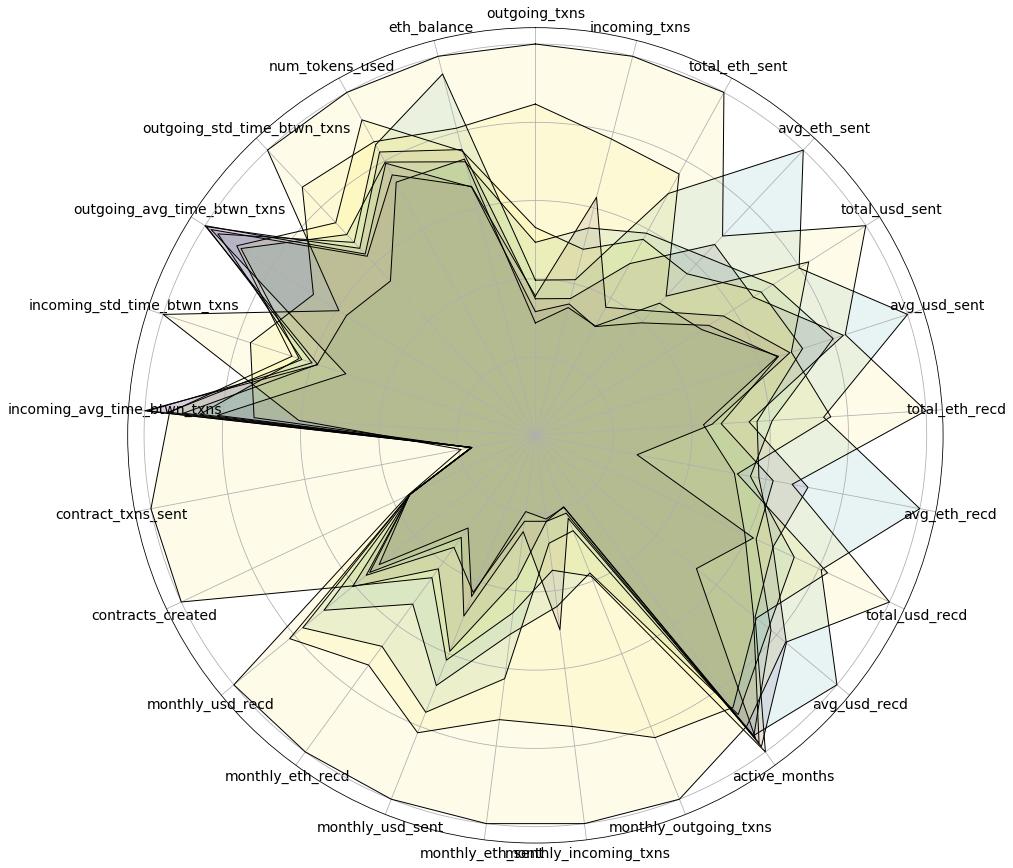

In [246]:
# Libraries
from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(9):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)
 
 
# # Add legend
# plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))

In [247]:
total_eth = {}
total_addresses = {}

for clust in np.unique(cl.labels_):
    mask = cl.labels_==clust
    eth = np.sum(df[mask]['eth_balance'])
    size = np.sum(cl.labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [248]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [249]:
names
dfr=dfr.loc[names]

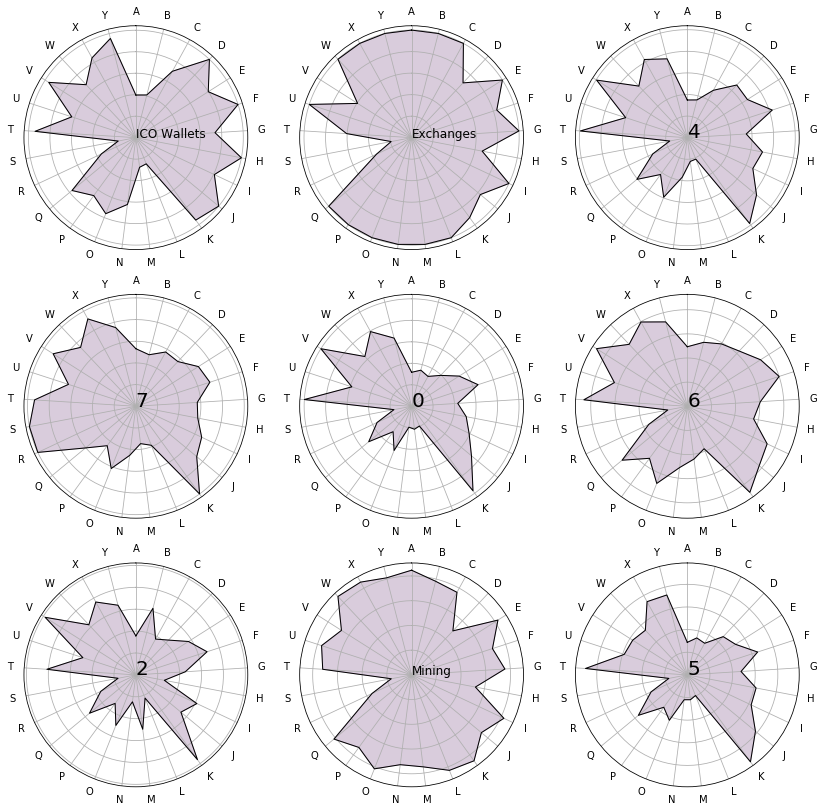

In [252]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(14,14))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(0)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(3,3,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=10)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
    fnt=20
    if lbl==101:
        lbl='Exchanges'
        fnt=12
    if lbl==1:
        lbl='ICO Wallets'
        fnt=12
    if lbl==100:
        lbl='Mining'
        fnt=12
    ax.text(1,0, str(lbl), fontsize=fnt)


In [180]:
dfdf = pd.DataFrame(pd.Series(d))

In [181]:
dfdf.sort_values(by=0)

,0
outgoing_txns,A
incoming_txns,B
total_eth_sent,C
avg_eth_sent,D
total_usd_sent,E
avg_usd_sent,F
total_eth_recd,G
avg_eth_recd,H
total_usd_recd,I
avg_usd_recd,J


In [182]:
names

array([  1, 101,   4,   7,   0,   6,   2, 100,   5], dtype=int32)

In [183]:
dftest=df_summary.loc[names]

In [184]:
dftest=dftest[dftest.columns[:-2]]

In [185]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [186]:
cos_sim = cosine_similarity(dftest)

In [187]:
idxs = np.argsort(cos_sim[-1])

In [188]:
test = cos_sim[idxs]

In [189]:
lbls = dftest.index[idxs]

In [190]:
dftest

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
1,16.705794,19.170321,4021.831396,248.887793,1.671981e+06,103157.679659,6079.873128,329.608474,1.923413e+06,103894.253069,...,465.448903,1.469757e+05,0.006886,0.021332,6.344932e+05,1.143255e+06,1.037757e+06,1.668461e+06,15.126243,766.539638
101,6426.544250,6317.437898,196291.284349,34.046300,8.084054e+07,12622.129706,191503.866109,33.539778,7.731011e+07,12254.813695,...,16645.723848,6.719452e+06,0.024339,0.198859,3.832738e+03,3.205317e+04,3.601656e+03,2.037750e+04,30.870585,1114.288329
4,10.131347,11.422883,270.418856,27.889034,1.169501e+05,11860.148445,492.328926,44.725116,1.409067e+05,12654.466003,...,32.789417,9.297082e+03,0.004584,0.011945,1.413218e+06,2.215685e+06,1.768574e+06,2.573729e+06,13.682807,154.253133
7,64.881652,43.103116,688.361270,13.760467,1.849429e+05,2995.918198,645.561318,18.203168,1.414043e+05,3448.529507,...,44.590892,8.820194e+03,5.291483,164.720305,6.003306e+05,1.233388e+06,4.309475e+05,9.409397e+05,21.303309,148.799435
0,7.076342,9.799170,23.132883,3.814353,8.709742e+03,1284.102539,105.241742,11.439569,3.079417e+04,3223.280701,...,7.486056,2.124769e+03,0.008517,0.020874,1.581267e+06,2.277777e+06,1.905131e+06,2.508514e+06,11.673853,69.184550
6,44.495261,75.398970,872.750651,21.074125,3.666331e+05,8397.677371,1079.444526,15.519268,4.461425e+05,6022.988836,...,110.434310,4.540021e+04,0.002018,0.005547,1.829523e+05,3.425476e+05,3.529834e+05,6.438256e+05,11.874501,118.872016
2,10.922637,167.336320,49.598236,5.309813,2.060551e+04,1951.796638,141.254943,1.224849,4.901279e+04,298.985664,...,10.654336,3.601845e+03,0.006739,0.012923,9.258752e+04,8.447236e+04,1.431402e+06,1.812082e+06,9.897823,70.239501
100,1434.905803,750.501799,8518.461339,7.864746,2.922734e+06,2052.810815,7752.576503,12.115456,2.702149e+06,3627.604768,...,875.737660,3.040620e+05,0.003472,0.021631,2.205633e+04,7.463054e+04,1.190983e+04,4.251259e+04,15.770015,242.923344
5,5.084728,8.848053,23.576924,6.552525,5.891108e+03,1332.700011,191.536119,23.704531,5.684290e+04,6676.064819,...,15.311840,4.360387e+03,0.005248,0.014132,3.498792e+05,5.079626e+05,2.533558e+03,1.932022e+03,8.910015,125.775850


In [191]:
idxs

array([6, 1, 7, 5, 0, 2, 4, 3, 8])

In [192]:
lbls

Int64Index([2, 101, 100, 6, 1, 4, 0, 7, 5], dtype='int64')

In [193]:
cmap=cm.get_cmap('YlGnBu')

In [194]:
from matplotlib.colors import LogNorm, PowerNorm

Text(114,0.5,'Cluster Number')

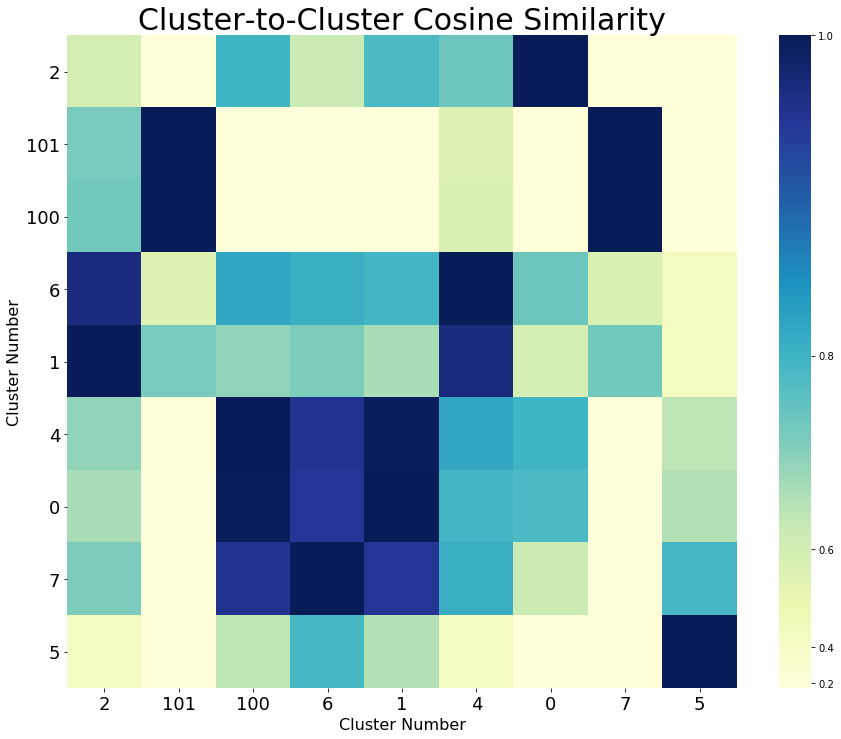

In [195]:
fig = plt.figure(figsize=(15,12))

# sns.heatmap(cos_sim,xticklabels=dftest.index, cmap=cm.get_cmap('Blues'),yticklabels=dftest.index, cbar=False)
sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=0)
plt.xlabel("Cluster Number", fontsize=16)
plt.ylabel("Cluster Number", fontsize=16)

In [196]:
lbls = [2,5,4,7,6,1,100,101]

In [197]:
dftest2 = dftest.loc[lbls]

In [198]:
cos_sim=cosine_similarity(dftest2)

In [199]:
test=cos_sim

In [200]:
test.shape

(8, 8)

In [201]:
lbls = ['Exchange' if l==101 else 'Mining' if l==100 else 'ICO Wallets' if l==1 else l for l in lbls]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text yticklabel objects>)

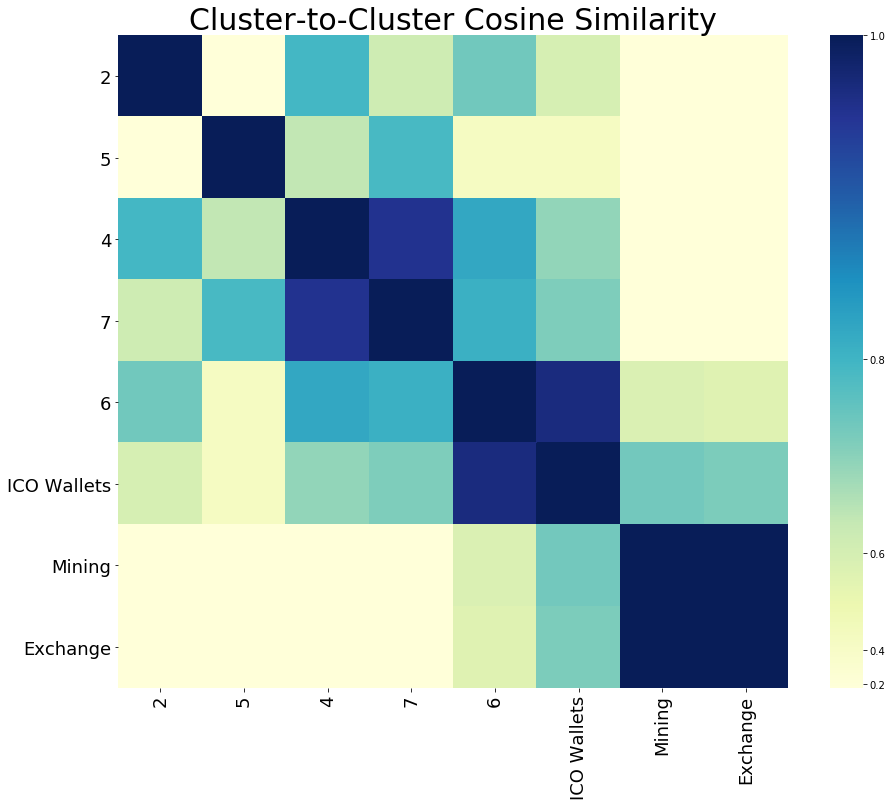

In [202]:
fig = plt.figure(figsize=(15,12))

sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18,rotation=0)



In [203]:
from sklearn.cluster import AgglomerativeClustering

In [204]:
ag = AgglomerativeClustering(n_clusters=8)

In [205]:
c = cl.cluster_centers_
df_scaled = pd.DataFrame(c, columns = df.columns[1:], index=np.unique(cl.labels_))

In [206]:
df_scaled

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
0,-2.843036,-0.332701,-0.082734,0.319527,-0.234031,-0.058715,-0.264532,0.102250,0.039621,0.010692,...,0.007971,0.012277,-0.029121,-0.014252,0.009682,0.005842,-0.001011,0.000875,-0.001525,-5.618016e-04
1,4.910307,-1.993388,-0.248318,-0.360354,0.237417,0.371648,-0.090096,-0.180582,-0.016171,-0.036452,...,-0.006332,-0.012586,-0.008822,0.066716,0.010391,0.008651,0.000057,-0.001652,-0.001332,-9.067897e-04
2,-1.794889,2.671909,0.564830,-1.455190,0.537494,0.117922,0.146564,-0.201304,-0.073573,0.003257,...,-0.036393,-0.033771,0.045132,0.045627,-0.020253,-0.000682,0.000989,-0.000353,0.000106,7.663201e-04
4,0.289942,-1.309310,0.101927,-0.016633,-0.097944,-0.146003,0.082893,0.085020,0.029755,0.038862,...,0.002019,-0.000620,0.026893,-0.016853,-0.006988,-0.007305,0.000323,-0.000800,0.001635,4.030411e-04
5,-1.370912,1.582384,-2.881643,2.413633,-0.941137,2.081219,2.574083,-1.202843,-0.770147,-0.277335,...,-0.048820,0.017774,0.007334,-0.005749,0.011484,-0.003250,0.004166,0.006033,0.001189,-4.450188e-05
6,2.487643,1.665165,-0.311419,-0.155959,-0.126946,-0.485727,-0.045374,0.182098,0.011583,-0.012719,...,0.054275,0.012818,-0.029640,-0.029560,0.004605,-0.005626,-0.000476,0.000910,0.001509,4.389784e-04
7,1.432079,1.683644,4.576920,6.843047,6.703872,0.069126,-0.122427,0.049654,-0.444840,-0.101135,...,0.020548,-0.009177,0.009216,-0.006352,0.004226,0.002771,-0.001219,-0.001091,-0.000606,-8.571619e-04
100,-2.206946,-0.084901,0.003943,0.077195,0.018227,0.064849,-0.044929,0.017992,0.031135,-0.018818,...,-0.001648,-0.000577,0.000100,-0.000640,-0.000050,-0.000144,0.000095,-0.000036,0.000007,-2.054549e-07
101,2.847672,0.109550,-0.005087,-0.099607,-0.023519,-0.083676,0.057973,-0.023215,-0.040174,0.024281,...,0.002126,0.000744,-0.000129,0.000825,0.000065,0.000186,-0.000122,0.000046,-0.000010,2.651031e-07


In [207]:
fitag = ag.fit(dftest)

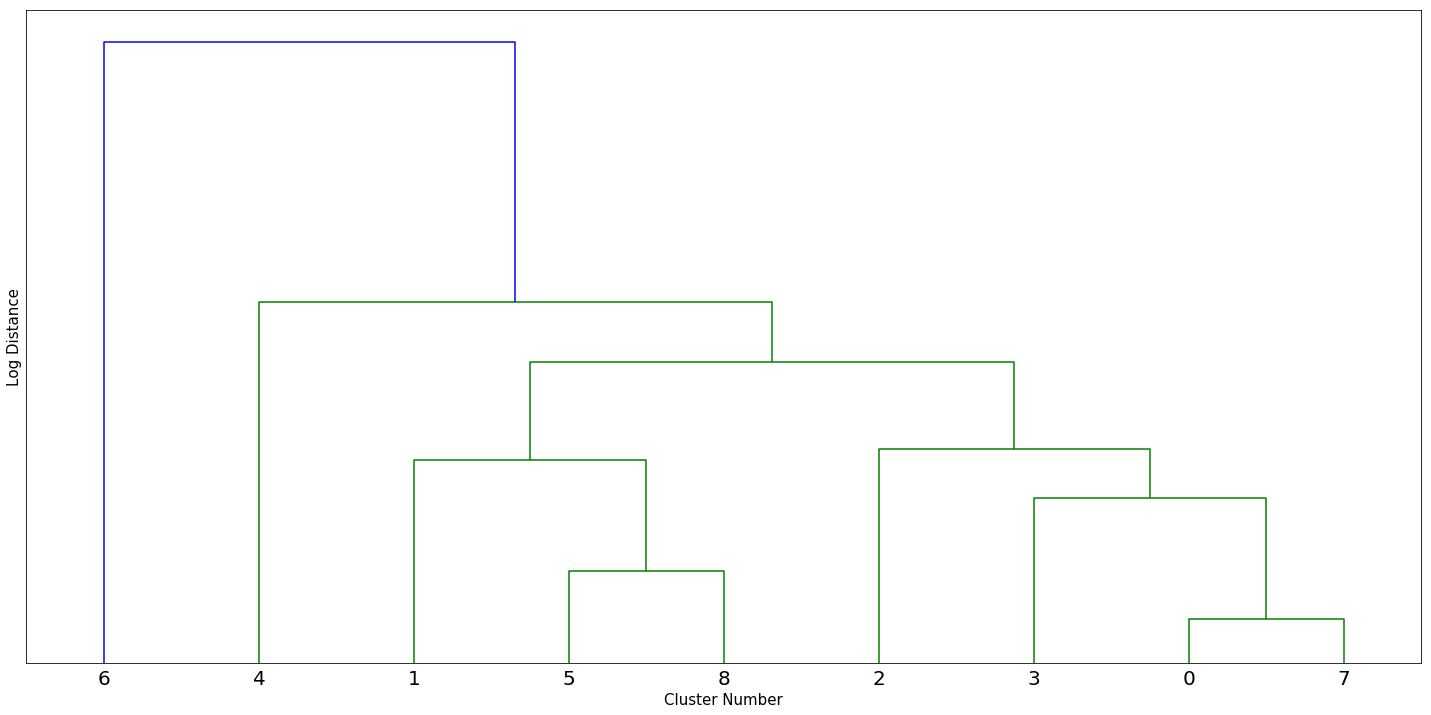

In [208]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, method='average',metric='euclidean')
fig=plt.figure(figsize=(25,12))
dendrogram(Z,color_threshold=8) 
# plt.ylim(0,1e8)
# plt.yscale('log')
# plt.ylim(1.5,60)
# plt.title("Cluster Dendrogram", fontsize=30)
plt.ylabel('Log Distance', fontsize=15)
plt.yticks([])
plt.xlabel("Cluster Number", fontsize=15)
plt.xticks(fontsize=20, rotation='horizontal')
plt.show()

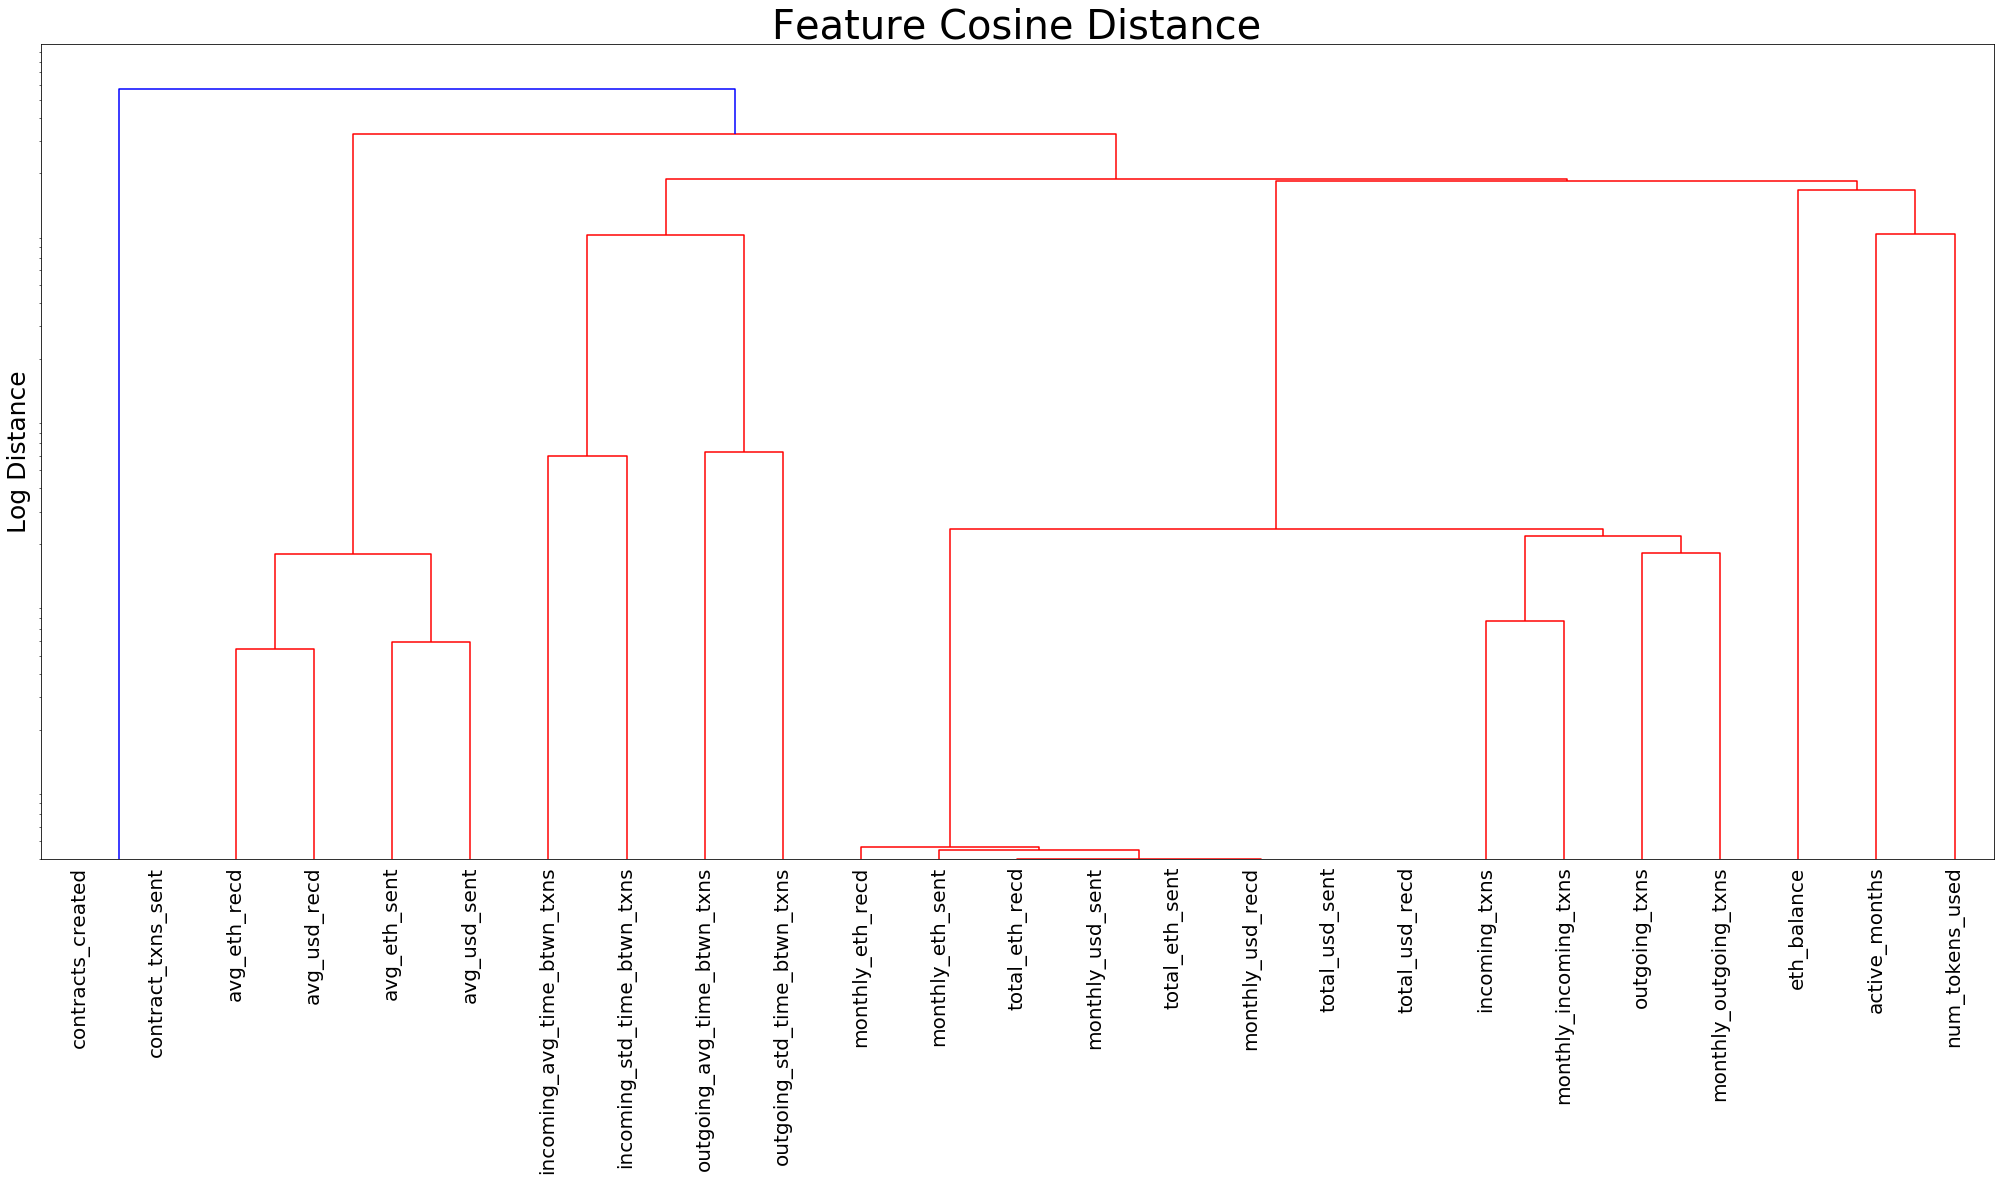

In [209]:

Z = linkage(dftest.T, metric='cosine')
fig=plt.figure(figsize=(35,15))
dendrogram(Z,labels=dftest.columns, color_threshold=.4) 
# plt.ylim(0,1e8)
plt.yscale('log')
plt.ylim(.00004,1)
plt.title("Feature Cosine Distance", fontsize=40)
plt.ylabel('Log Distance', fontsize=25)
plt.yticks([])

plt.xticks(fontsize=20, rotation='vertical')
plt.show()

In [210]:
df_summary.columns[8]

'total_usd_recd'

In [211]:
df_radar = df_summary#.loc[list(clusters)]

In [212]:
df_radar['label'] = df_radar.index

In [213]:
df_radar = df_radar.reset_index()

In [214]:
df_radar.set_index('label', inplace=True)

In [215]:
df_radar[df_radar<0] = 0

In [216]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [217]:
#log scale
df_radar = np.log1p(df_radar)+1

label with my name for category
round negative results in summary to zero


In [218]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [219]:
list(df_radar)[1:-1]

['outgoing_txns',
 'incoming_txns',
 'total_eth_sent',
 'avg_eth_sent',
 'total_usd_sent',
 'avg_usd_sent',
 'total_eth_recd',
 'avg_eth_recd',
 'total_usd_recd',
 'avg_usd_recd',
 'active_months',
 'monthly_outgoing_txns',
 'monthly_incoming_txns',
 'monthly_eth_sent',
 'monthly_usd_sent',
 'monthly_eth_recd',
 'monthly_usd_recd',
 'contracts_created',
 'contract_txns_sent',
 'incoming_avg_time_btwn_txns',
 'incoming_std_time_btwn_txns',
 'outgoing_avg_time_btwn_txns',
 'outgoing_std_time_btwn_txns',
 'num_tokens_used',
 'eth_balance']

In [220]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [221]:
feats = df.columns[1:].values

In [222]:
df_radar = df_radar[feats]

In [223]:
clusters

[101, 100, 1]

In [224]:
df_radar = df_radar.loc[list(clusters)]

In [225]:
colors = ('green','blue','orange')
categ = ('Exchanges', 'Mining', 'ICO Wallets')

In [226]:
d = dict(zip(categ, df_radar.index))

In [227]:
lbls = list(d.keys())
cats = list(d.values())

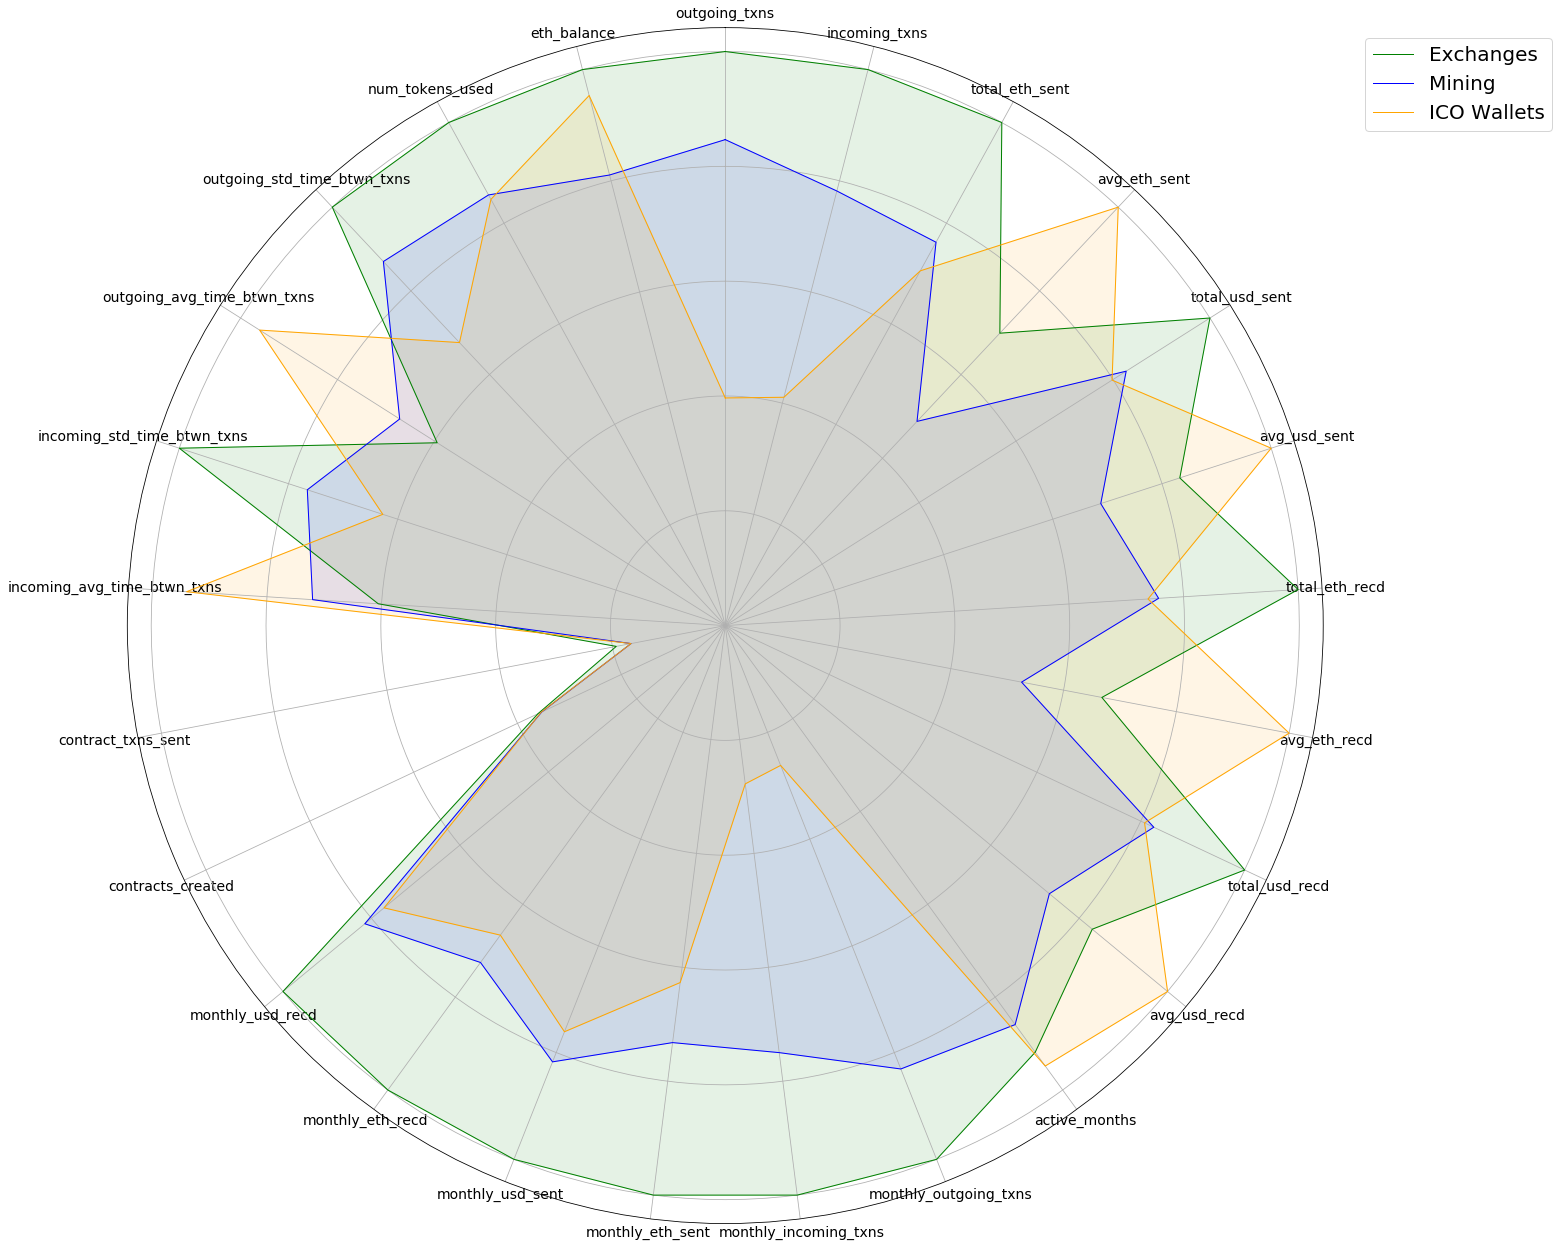

In [228]:

fig = plt.figure(figsize=(22,22))
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)

# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
 
for i in range(3):
    # Ind1
    lbl = lbls[i]
    values=df_radar.loc[cats[i]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, c=colors[i],linestyle='solid', label=lbl)
    ax.fill(angles, values, c=colors[i], alpha=0.1)

 
# Add legend
plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))